In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
data=pd.read_csv('/content/drive/MyDrive/temperature sensor/measures_v2.csv')

In [5]:
data.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


preprocessing

In [7]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop profile_id column
    df = df.drop('profile_id', axis=1)
    
    # Split df into X and y
    y = df['pm'].copy()
    X = df.drop('pm', axis=1).copy()
    
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y


In [8]:
X, y = preprocess_inputs(data)

In [9]:
X

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,stator_yoke,ambient,torque
0,-1.238979,-0.799812,-1.648158,0.392820,-1.681117,-1.184128,1.058337,-0.405855,-1.494244,-2.443386,-0.400838
1,-1.236150,-0.799197,-1.647959,0.393521,-1.681047,-1.184129,1.058278,-0.405867,-1.494323,-2.443396,-0.400082
2,-1.238757,-0.798729,-1.648064,0.392464,-1.681078,-1.184128,1.058289,-0.405854,-1.493755,-2.443404,-0.400974
3,-1.236180,-0.798417,-1.648285,0.393356,-1.681146,-1.184126,1.058270,-0.405836,-1.493529,-2.443409,-0.400174
4,-1.239442,-0.797432,-1.648303,0.393101,-1.681195,-1.184127,1.057279,-0.405455,-1.493738,-2.443413,-0.400565
...,...,...,...,...,...,...,...,...,...,...,...
1330811,-1.277497,-0.252853,-0.734801,0.410918,-0.651102,-1.184129,1.027466,-0.393952,-0.476927,-0.298612,-0.403264
1330812,-1.279909,-0.252853,-0.736038,0.410713,-0.653952,-1.184128,1.027461,-0.393952,-0.476796,-0.308136,-0.403264
1330813,-1.277003,-0.252853,-0.736995,0.411126,-0.656745,-1.184128,1.027480,-0.393939,-0.477067,-0.304750,-0.403264
1330814,-1.280131,-0.252852,-0.737626,0.410463,-0.658601,-1.184126,1.027453,-0.393972,-0.476829,-0.292215,-0.403264


In [10]:
y

0          24.554214
1          24.538078
2          24.544693
3          24.554018
4          24.565397
             ...    
1330811    62.147780
1330812    62.142646
1330813    62.138387
1330814    62.133422
1330815    62.131429
Name: pm, Length: 1330816, dtype: float64

EDA

In [11]:
eda_df = pd.concat([X, y], axis=1).copy()

UNIVARIATE ANALYSIS

In [12]:
eda_df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,stator_yoke,ambient,torque,pm
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,-1.413184e-15,-1.452328e-14,-1.619060e-14,-6.408338e-15,2.581035e-14,1.810846e-15,1.453754e-15,-5.795286e-16,-6.691870e-14,-2.172280e-13,4.327279e-13,5.850678e+01
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.900150e+01
min,-1.801316e+00,-1.175346e+00,-1.665627e+00,-1.686374e+00,-1.688055e+00,-1.332301e+00,-3.223109e+00,-3.588988e+00,-1.506242e+00,-8.179116e+00,-3.598497e+00,2.085696e+01
25%,-9.555356e-01,-8.047253e-01,-8.215244e-01,-8.488737e-01,-8.043913e-01,-1.013609e+00,-7.190350e-01,-3.939704e-01,-8.102463e-01,-7.154374e-01,-4.050452e-01,4.315158e+01
50%,-1.209064e-01,-4.282472e-01,-4.299018e-02,2.806072e-01,-3.669520e-02,-1.086778e-01,2.714027e-01,-2.347401e-01,-1.281805e-01,1.202738e-01,-2.624682e-01,6.026629e+01
75%,8.094359e-01,6.255120e-01,7.602662e-01,4.216716e-01,8.150887e-01,8.380866e-01,1.012381e+00,6.855945e-01,6.639420e-01,8.560482e-01,7.842169e-01,7.200837e+01
max,1.782935e+00,3.000463e+00,2.616490e+00,2.482149e+00,2.399238e+00,2.042271e+00,1.059068e+00,2.867105e+00,2.649193e+00,3.186775e+00,2.980456e+00,1.136066e+02


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

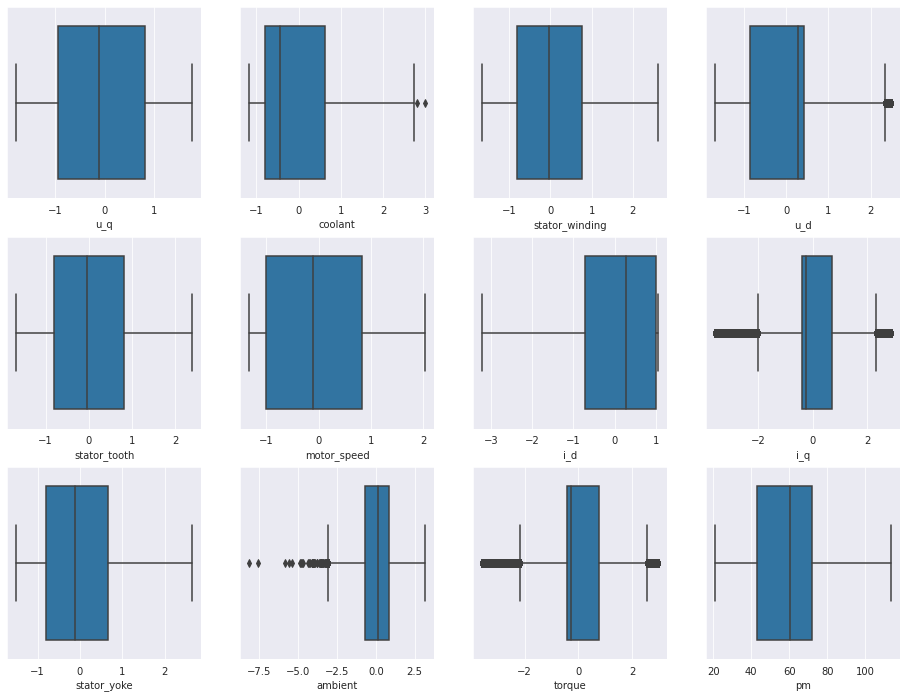

In [18]:
plt.figure(figsize=(16, 12))
for i in range(len(eda_df.columns)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(eda_df[eda_df.columns[i]])
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print("Model R^2 Score: {:.4f}".format(model.score(X_test, y_test)))

Model R^2 Score: 0.8553
